In [4]:
import pandas_datareader as pdr

ModuleNotFoundError: No module named 'pandas_datareader'

In [5]:
pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
key='69bf8e4820e7db9309c78164cdcf9b6c653c844c'

In [1]:
import pandas_datareader as pdr

In [5]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

C:\Users\ALANKRIT MISHRA\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [10]:
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-11 00:00:00+00:00,223.85,224.30,216.56,218.01,35749049,53.593237,53.700974,51.847895,52.195048,142996196,0.0,1.0
1,AAPL,2018-09-12 00:00:00+00:00,221.07,225.00,219.84,224.94,49278740,52.927661,53.868565,52.633179,53.854200,197114960,0.0,1.0
2,AAPL,2018-09-13 00:00:00+00:00,226.41,228.35,222.57,223.52,41706377,54.206141,54.670608,53.286785,53.514230,166825508,0.0,1.0
3,AAPL,2018-09-14 00:00:00+00:00,223.84,226.84,222.52,225.75,31999289,53.590843,54.309090,53.274814,54.048127,127997156,0.0,1.0
4,AAPL,2018-09-17 00:00:00+00:00,217.88,222.95,217.27,222.15,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0


In [12]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-09-01 00:00:00+00:00,189.46,189.920,188.28,189.485,45766503,189.46,189.920,188.28,189.485,45766503,0.0,1.0
1253,AAPL,2023-09-05 00:00:00+00:00,189.70,189.980,187.61,188.280,45280027,189.70,189.980,187.61,188.280,45280027,0.0,1.0
1254,AAPL,2023-09-06 00:00:00+00:00,182.91,188.850,181.47,188.400,81755816,182.91,188.850,181.47,188.400,81755816,0.0,1.0
1255,AAPL,2023-09-07 00:00:00+00:00,177.56,178.210,173.54,175.180,112488803,177.56,178.210,173.54,175.180,112488803,0.0,1.0
1256,AAPL,2023-09-08 00:00:00+00:00,178.18,180.239,177.79,178.350,65602066,178.18,180.239,177.79,178.350,65602066,0.0,1.0


In [13]:
df1=df.reset_index()['close']
df1.shape

(1257,)

In [14]:
df1

0       223.85
1       221.07
2       226.41
3       223.84
4       217.88
         ...  
1252    189.46
1253    189.70
1254    182.91
1255    177.56
1256    178.18
Name: close, Length: 1257, dtype: float64

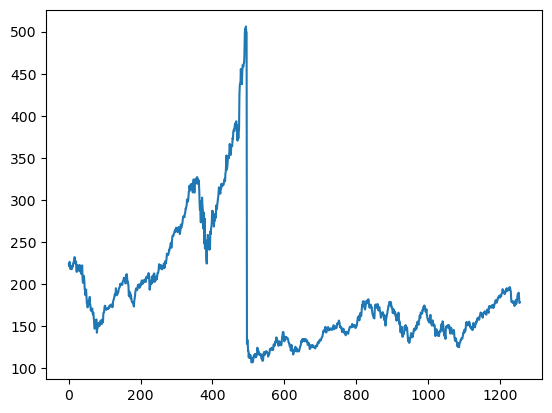

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)
# plt.show

In [17]:
#LSTM as sensitive to scale so we need to apply MinMax scaler

In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(1257, 1)

In [24]:
df1

array([[0.29307451],
       [0.28611146],
       [0.29948654],
       ...,
       [0.19053225],
       [0.17713212],
       [0.17868503]])

In [45]:
#Splitting the data into train and test wihtout using the train_test_split as this is a time series data
training_len=int(len(df1)*0.65)
test_len=len(df1)-training_len
train_data,test_data=df1[0:training_len:],df1[training_len:len(df1):1]

In [46]:
train_data.shape,test_data.shape

((817, 1), (440, 1))

In [47]:
training_len,test_len

(817, 440)

In [56]:
#Creating a time series data by taking timestamps which are  basically the number of previous day data that we have to consider
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [57]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [58]:
print(x_train)

[[0.29307451 0.28611146 0.29948654 0.29304947 0.27812148 0.27902317
  0.27934878 0.28350657 0.27757044 0.28541014 0.28891672 0.28448341
  0.29582968 0.29780839 0.30161553 0.30667502 0.31366312 0.30344396
  0.29417658 0.29287414 0.3006387  0.27431434 0.26953037 0.28871634
  0.27681904 0.28881653 0.28641202 0.27346274 0.28170319 0.28505949
  0.29026925 0.27113338 0.28293049 0.27416406 0.26399499 0.26664997
  0.28057608 0.28899186 0.25207264 0.23731997 0.24278021 0.25825924
  0.25460238 0.2445335  0.21873513 0.21387602 0.20027552 0.21182217
  0.21713212 0.1979211  0.1756794  0.17517846 0.16393237 0.16976832
  0.16881653 0.185598   0.18211647 0.17968691 0.19531622 0.17495304
  0.17001879 0.15441453 0.15719474 0.15476518 0.15594239 0.16057608
  0.14687539 0.14301816 0.14835316 0.13537884 0.12520977 0.10993112
  0.10016281 0.12606137 0.12350657 0.12370695 0.12748904 0.12793989
  0.08854101 0.10374452 0.10291797 0.10998121 0.11639324 0.11762054
  0.11383845 0.10810269 0.11579211 0.12047589 0.

In [60]:
print(X_test.shape)

(339, 100)


In [61]:
X_train.shape

(716, 100)

In [62]:
#converting into a 3 dimension shape to give it as input to out lstm
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [63]:
X_train.shape

(716, 100, 1)

In [64]:
X_train

array([[[0.29307451],
        [0.28611146],
        [0.29948654],
        ...,
        [0.1492799 ],
        [0.14948028],
        [0.16132749]],

       [[0.28611146],
        [0.29948654],
        [0.29304947],
        ...,
        [0.14948028],
        [0.16132749],
        [0.16866625]],

       [[0.29948654],
        [0.29304947],
        [0.27812148],
        ...,
        [0.16132749],
        [0.16866625],
        [0.16881653]],

       ...,

       [[0.09718222],
        [0.1059737 ],
        [0.10429555],
        ...,
        [0.13375078],
        [0.14642455],
        [0.14509706]],

       [[0.1059737 ],
        [0.10429555],
        [0.09906074],
        ...,
        [0.14642455],
        [0.14509706],
        [0.14256731]],

       [[0.10429555],
        [0.09906074],
        [0.08919224],
        ...,
        [0.14509706],
        [0.14256731],
        [0.1377583 ]]])

In [67]:
#Creating stacked LSTM
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [73]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0121 - val_loss: 9.6323e-04
Epoch 2/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0096 - val_loss: 3.7294e-04
Epoch 3/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0089 - val_loss: 3.3530e-04
Epoch 4/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0078 - val_loss: 6.3956e-04
Epoch 5/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0072 - val_loss: 3.7514e-04
Epoch 6/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0066 - val_loss: 5.5966e-04
Epoch 7/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0063 - val_loss: 4.3998e-04
Epoch 8/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0054 - val_loss: 3.9033e-04
Epoch 9/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0059 - val_loss: 2.6059e-04
Epoch 10/100
12/12 [==============================] - 1s 88ms/s

12/12 [==============================] - 1s 84ms/step - loss: 0.0010 - val_loss: 2.1693e-04
Epoch 80/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0012 - val_loss: 2.2230e-04
Epoch 81/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0016 - val_loss: 2.2962e-04
Epoch 82/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0015 - val_loss: 2.4114e-04
Epoch 83/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0012 - val_loss: 2.2443e-04
Epoch 84/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0011 - val_loss: 2.7023e-04
Epoch 85/100
12/12 [==============================] - 1s 83ms/step - loss: 9.4483e-04 - val_loss: 2.1970e-04
Epoch 86/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0011 - val_loss: 2.3199e-04
Epoch 87/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0010 - val_loss: 2.2149e-04
Epoch 88/100
12/12 [==============================] - 1s 84ms/st

In [78]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 16ms/step


In [79]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [80]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.91364947056982

In [81]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

157.10661025472356

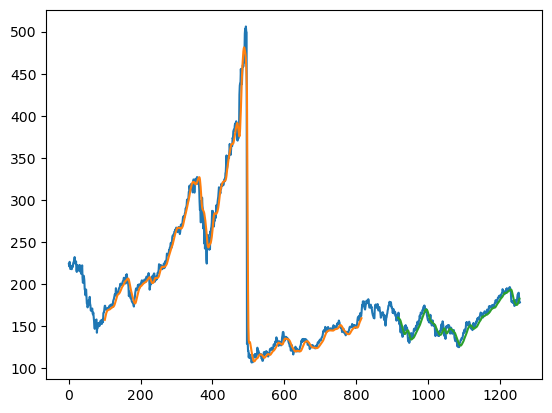

In [82]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [83]:
len(test_data)

440

In [86]:
x_input=test_data[340:].reshape(1,-1)

In [87]:
x_input.shape

(1, 100)

In [88]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [89]:
temp_input

[0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19